# 3 决策树算法

## 背景知识：
1. 决策树算法的核心思想
2. ID3算法, C4.5, CART
3. 信息增益，信息熵
4. 另一个度量集合无序程度的方法是基尼不纯度

## Notes

In [19]:
# extend。append的区别
a = [1,2,3]
b = [4,5,6]
a.append(b)
print(a)
a = [1,2,3]
a.extend(b)
print(a)

[1, 2, 3, [4, 5, 6]]
[1, 2, 3, 4, 5, 6]


### mark

In [39]:
# list的一些基本操作
a = [[1,2,3],[4,5,6],[7,8,9]]
## pyython build-in list start from zero
print(a[0][0])
## 前两个元素
print(a[:1])
## 第三个元素至最后一个元素
print(a[1:])

1
[[1, 2, 3]]
[[4, 5, 6], [7, 8, 9]]


In [59]:
b = [1,2,3]
a = b[:]
print(a)
b = [1,[2,3]]
a = b[:]
print(a)
b = [1,2,3]
## a=b 是传递引用，a,b两个指针指向同一区域
a = b
print(a)
b.append(3)
print(a)

[1, 2, 3]
[1, [2, 3]]
[1, 2, 3]
[1, 2, 3, 3]


In [55]:
# 如何索引字典的键
test = {"a": 1, "b": 2}
print(test.keys())
#print(test.keys()[0])
temp = list(test.keys())
print(temp)
print(temp[0])

dict_keys(['a', 'b'])
['a', 'b']
a


## Code

In [7]:
from math import log
import operator
import matplotlib.pyplot as plt

# 计算数据集的shannonEnt，其中prob为p(xi)
def calShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

# 创建数据集
def createDataSet():
    dataSet = [[1,1,'yes'],
               [1,1,'yes'],
               [1,0,'no'],
               [0,1,'no'],
               [0,1,'no']]
    labels = ['no surfacing', 'flippers']
    return(dataSet, labels)

# 按照给定的特征划分数据集
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)
    return retDataSet

# 选择最好的数据集划分方式
## 先计算基本信息熵，然后取出特征列，去重，根据特征列中的值，对整个数据集进行划分，计算信息熵
## 计算信息增益，对比信息增益，一次取出特征列
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet))
            newEntropy += prob * calShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

# 处理所有的属性之后，到达叶子节点之后，同一分组中仍然有不同的属性
## 对叶子节点分组列表中的数据进行排序，第一个就是叶子节点的分类
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys:
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

# 创建树
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    ## 类别相同的时候停止划分
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    ## 遍历完所有的特征，但仍然存在不同的类别，此时返回统计出现最多的类别
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    ## 找到最优特征
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    ## 声明树的数据结构
    myTree = {bestFeatLabel: {}}
    ## 从标签中删除最优标签
    del(labels[bestFeat])
    ## 最优标签的所有值，去重，得到集合
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    ## 递归生成树的数据结构
    for value in uniqueVals:
        ### 复制list操作
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet\
                                                  (dataSet, bestFeat, value), subLabels)
    return myTree

### Matplotlib库绘制树形图(need to be learned)

In [16]:
# Matplotlib 绘制树形图
'''
Mark the code block needed to be learned.
Created on Oct 14, 2010

@author: Peter Harrington
'''
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def getNumLeafs(myTree):
    numLeafs = 0
    # firstStr = myTree.keys()[0]
    temp = list(myTree.keys())
    firstStr = temp[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    # firstStr = myTree.keys()[0]
    temp = list(myTree.keys())
    firstStr = temp[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    # firstStr = myTree.keys()[0]     #the text label for this node should be this
    temp = list(myTree.keys())
    firstStr = temp[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

#def createPlot():
#    fig = plt.figure(1, facecolor='white')
#    fig.clf()
#    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
#    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

#createPlot(thisTree)

### 使用决策树进行分类

In [9]:
def classify(inputTree, featureLabels, testVec):
    # There are problem
    #firstStr = inputTree.keys()[0]
    temp = inputTree.keys()
    firstStr = list(temp)[0]
    secondDict = inputTree[firstStr]
    featIndex = featureLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featureLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel

### 使用pickle模块存储决策树

In [64]:
# there are problems
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, 'w')
    pickle.dump(inputTree, fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)

## 测试函数

In [41]:
# test 1
myDat, labels = createDataSet()
print(myDat)
calShannonEnt(myDat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


0.9709505944546686

熵越高，则混合的数据越多。在函数级中添加分类，查看熵的变化。

In [42]:
# test 2
myDat[0][-1] = "maybe"
print(myDat)
calShannonEnt(myDat)

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


1.3709505944546687

In [43]:
# test 3
myDat, labels = createDataSet()
print(myDat)
## 筛选featVet中第一个元素的值为1
print(splitDataSet(myDat, 0, 1))
## 筛选featVet中第一个元素的值为0
print(splitDataSet(myDat, 0, 0))

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]


In [48]:
# test 4
myDat, labels = createDataSet()
print(chooseBestFeatureToSplit(myDat))
print(myDat)

0
[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


In [53]:
# test 5
myDat, labels = createDataSet()
myTree = createTree(myDat, labels)
print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [56]:
# test 6
myDat, labels = createDataSet()
myTree = retrieveTree(0)
print(classify(myTree, labels, [1,0]))
print(classify(myTree, labels, [1,1]))

no
yes


In [63]:
# there are problems
storeTree(myTree, 'classfierStorage.txt')
grabTree('classfierStorage.txt')

TypeError: write() argument must be str, not bytes

### 决策树预测隐形眼镜类型

{'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard', 'hyper': {'age': {'presbyopic': 'no lenses', 'pre': 'no lenses', 'young': 'hard'}}}}, 'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}}, 'pre': 'soft', 'young': 'soft'}}}}}}


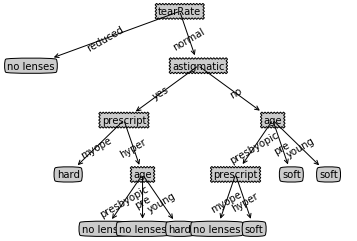

In [17]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
print(lensesTree)
createPlot(lensesTree)